In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
email = pd.read_csv('messages.csv')
email

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
email.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [4]:
email.dropna(inplace=True)

In [5]:
email.shape

(2831, 3)

In [6]:
email.drop_duplicates(inplace=True)

In [7]:
email

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [8]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [9]:
email['subject'].apply(process_text)

0              [job, posting, appleiss, research, center]
2       [query, letter, frequencies, text, identificat...
3                                                  [risk]
4                            [request, book, information]
5        [call, abstracts, optimality, syntactic, theory]
                              ...                        
2888                            [love, profile, ysuolvpv]
2889                                [asked, join, kiddin]
2890                    [anglicization, composers, names]
2891    [6, 797, comparative, method, n, ary, comparison]
2892                       [american, english, australia]
Name: subject, Length: 2814, dtype: object

In [12]:
mess = CountVectorizer(analyzer=process_text).fit_transform(email['message'])

In [13]:
x=mess
y=email['label']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [15]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [16]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x_train,y_train)
gsc.best_params_

{'n_estimators': 13}

In [17]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 1}

In [18]:
knn =KNeighborsClassifier(n_neighbors=1 )
svc = SVC()
dt= DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators= 13)
lr = LogisticRegression()

In [19]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("LogisticRegression",lr))
models.append(("RandomForestClassifier",rf))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(n_neighbors=1)


Accuracy score =  0.9472551130247578


cross_val_score=  0.9360238257489716


roc_auc_score =  0.9034374462226811


Classification_Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       780
           1       0.83      0.84      0.84       149

    accuracy                           0.95       929
   macro avg       0.90      0.90      0.90       929
weighted avg       0.95      0.95      0.95       929



[[755  25]
 [ 24 125]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC()


Accuracy score =  0.9504843918191603


cross_val_score=  0.9442038313015825


roc_auc_score =  0.8456375838926175


Classification_Report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       780
           1       1.00      0.69      0.82   

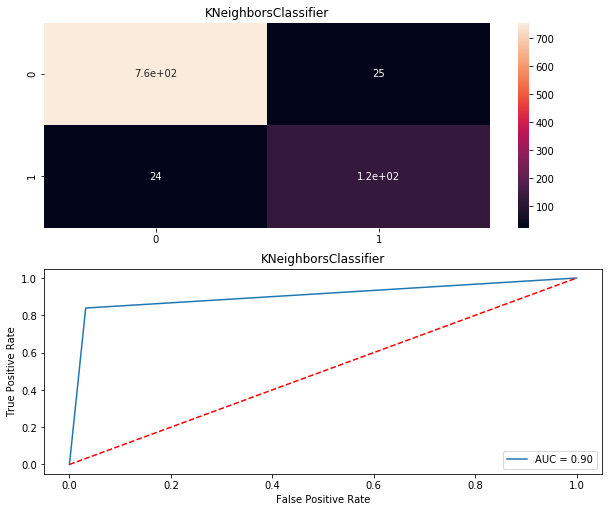

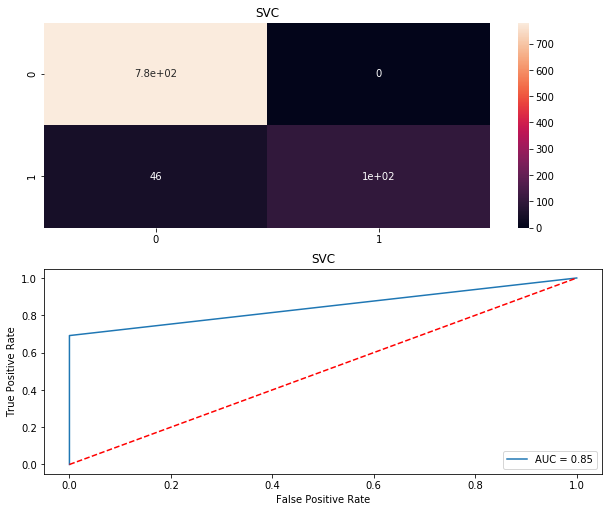

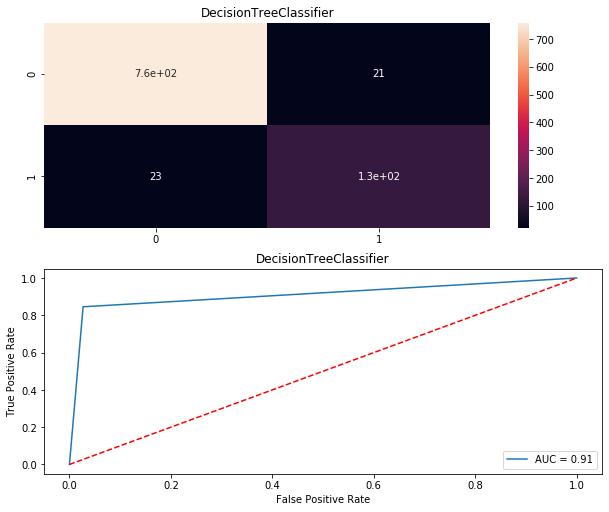

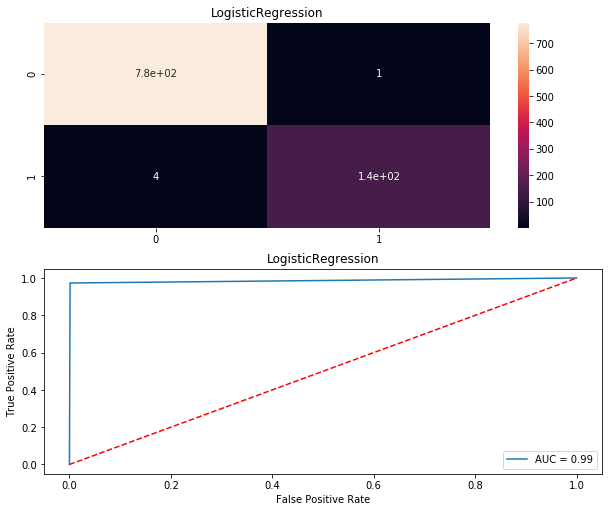

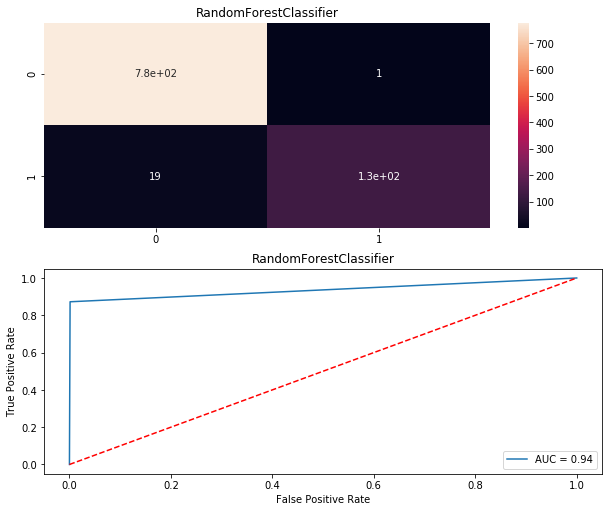

In [20]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [21]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,94.725511,93.602383,90.343745
1,SVC,95.048439,94.420383,84.563758
2,DecisionTreeClassifier,95.263724,95.699881,90.935725
3,LogisticRegression,99.461787,98.685672,98.593616
4,RandomForestClassifier,97.847147,97.298907,93.560059


In [22]:
from sklearn.externals import joblib
joblib.dump(lr,"Email Spam.obj")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\__init__.py)